In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.neighbors import KNeighborsClassifier #사용할 훈련 모델
import matplotlib.pyplot as plt
import pandas as pd #데이터 시각화를 위한 데이터프레임 생성
iris_dataset = load_iris() #붓꽃의 데이터셋 로드

In [2]:
iris_dataset['data'][100] #붓꽃의 데이터셋

array([6.3, 3.3, 6. , 2.5])

In [ ]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_dataset['target_names'] #붓꽃의 종류

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_dataset['feature_names'] #붓꽃의 특성

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
                                          train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 42)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
sample_1 = np.array([[5.0, 3.0, 1.3, 0.2]])
predict_sample_1 = kn.predict(sample_1)
print(predict_sample_1)
print(iris_dataset['target_names'][predict_sample_1])

#보라색 점들은 setosa의 데이터셋이다.

[0]
['setosa']


In [ ]:
sample_2 = np.array([[5.5, 2.3, 3, 1.2]])
predict_sample_2 = kn.predict(sample_2)
print(predict_sample_2)
print(iris_dataset['target_names'][predict_sample_2])

#연두색 점들은 versicolor의 데이터셋이다.

[1]
['versicolor']


In [ ]:
sample_3 = np.array([[7.5, 5, 3.5, 4.3]])
predict_sample_3 = kn.predict(sample_3)
print(predict_sample_3)
print(iris_dataset['target_names'][predict_sample_3])

#노란색 점들은 virginica의 데이터셋이다.

#데이터셋을 분석하면 setosa 데이터들은 sepal width의 값이 대체로 크며 petal length,width가 작다.
#versicolor의 데이터들은 나머지 2가지 데이터셋들에 비해 중간값을 가지고 있다.

[2]
['virginica']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00b8bec750>,
      dtype=object)

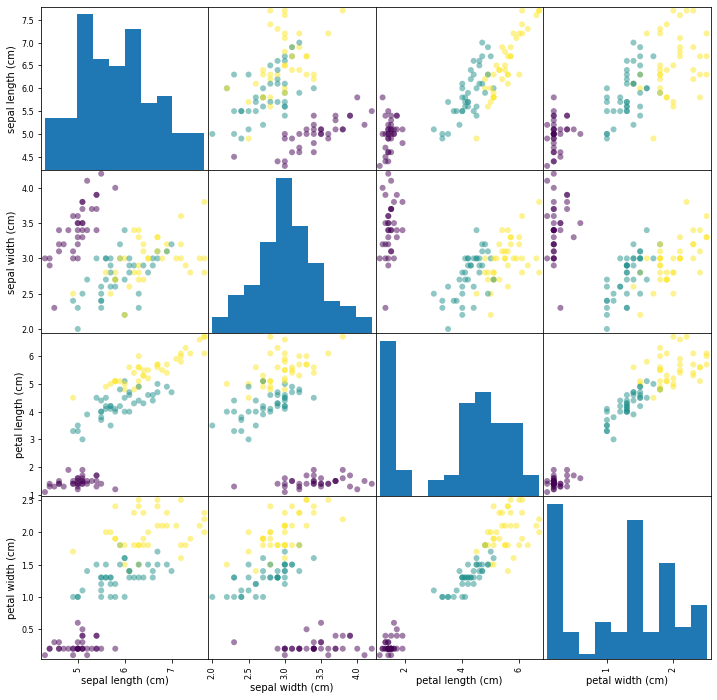

In [ ]:
import pandas as pd
iris_dataframe = pd.DataFrame(train_input, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = train_target , figsize = (12,12),marker = 'o')

#보라색

In [ ]:
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

#예측은 정확하게 했지만 점수를 보아하니 모델의 과소적합 문제가 발생한다.

0.9642857142857143
1.0


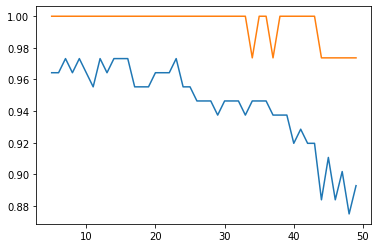

In [ ]:
#과소적합 문제를 해결하기 위해서 KNeighborsClassifer의 최적의 매개변수를 찾아보자


def count(a):
  list_train = []
  list_test = []
  list_n = []
  for n in range(5, a):
    kn = KNeighborsClassifier(n_neighbors = n)
    kn.fit(train_input, train_target)
    list_n.append(n)
    list_train.append(kn.score(train_input, train_target))
    list_test.append(kn.score(test_input, test_target))
  plt.plot(list_n,list_train)
  plt.plot(list_n,list_test)
  plt.show()

count(50)
#그래프를 보았을 때 태스트 점수는 무조건 1이고 최대 훈련 세트의 점수는 0.97
#0.97 지점중에서 가장 적은 매개변수는 6정도로 보인다
#더 세분화 시켜서 보자

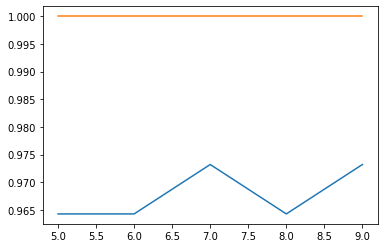

In [ ]:
count(10)

#매개변수의 범위를 5~10으로 줄였더니 7에서 가장 높은 훈련 점수가 나왔다.

In [ ]:
#매개변수를 7로 두고 모델을 훈련해보고 전과 같은 샘플값을 넣어보자
kn = KNeighborsClassifier(n_neighbors = 7)
kn.fit(train_input, train_target)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9732142857142857
1.0


In [ ]:
predict_sample_3_1 = kn.predict(sample_3)
print(predict_sample_3_1)
print(iris_dataset['target_names'][predict_sample_3_1])


[2]
['virginica']


이렇게 분류해도 누가 맞는지 정확히 알수 없고, 과소적합 문제를 해결할 수 없기에 다른 모델을 사용하여 분류해보자

In [ ]:
#로지스틱 회귀 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter =1000)
from sklearn.preprocessing import StandardScaler #정확도를 높이기 위한 데이터 전처리(규제)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
lr.fit(train_scaled, train_target)

LogisticRegression(max_iter=1000)

테스트 세트에도 규제를 적용하니까 점수가 이상하니 한번 테스트 세트의 타깃 값을 한번 보자

In [ ]:
print(test_target)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


test세트에 타깃 데이터 값이 너무 부족해서 과대적합이 나온 것 같다.
이러면 데이터 전처리를 시행하지 말고 테스트 세트의 점수를 보자

In [ ]:
lr_predict_sample_1 = lr.predict(sample_1)
print(lr_predict_sample_1)
print(iris_dataset['target_names'][predict_sample_1])

[1]
['setosa']


In [ ]:
lr_predict_sample_3 = lr.predict(sample_3)
print(lr_predict_sample_3)
print(iris_dataset['target_names'][predict_sample_3])

[2]
['virginica']


knn 모델과 동일하게 로지스틱 회귀 모델은 setosa로 동일하게 분류했다. 한번 점수를 보자

In [ ]:
print(lr.score(train_scaled, train_target))

0.9642857142857143


In [ ]:
print(lr.score(test_scaled, test_target))

1.0


In [ ]:
  #점수도 비슷하게 나온다.